# Capstone Regression Project

Joe Fioramonti

## Business Understanding

Comparing factors contributing to the sale price of homes on or adjacent to the Waterfront or Greenbelt, and those not, 
in King County, Washington. 

## Data Understanding

The Data from KingCounty.gov represents home sales in King County, Washington between 2021 and 2022.  

There are 30,155 total rows.

Each row is one home sale and contains values such as sale price, square footage, year built, number of bedrooms, and number of bathrooms.

Subjective values are also present in the form of scales representing the condition and view from the home.

## Data Preparation

### Loading the Data

In [50]:
# Importing Python libraries.

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np

import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

# Loading Data.

df =  pd.read_csv('data/kc_house_data.csv')

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


### Data Exploration

In [51]:
# Overview of the Data 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [52]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


Average sale price of $1,108,536.

Average number of bedrooms and bathrooms are 3.4 and 2.3 respectively.

Average size of 2112 square feet.

Year built ranges from 1900 to 2022 with an average of 1975.

### Data Cleaning

In [53]:
# Remove id column.
df.drop(labels='id', axis=1, inplace= True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [54]:
# Convert 'date' data type to date/time.

df.date = df.date.apply(lambda x: pd.to_datetime(x, yearfirst=True))

In [55]:
df.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront               object
greenbelt                object
nuisance                 object
view                     object
condition                object
grade                    object
heat_source              object
sewer_system             object
sqft_above                int64
sqft_basement             int64
sqft_garage               int64
sqft_patio                int64
yr_built                  int64
yr_renovated              int64
address                  object
lat                     float64
long                    float64
dtype: object

In [56]:
# Create column for age of house.

df['year_old'] = np.where(df['yr_renovated'] != 0, df.date.apply(lambda x: x.year) - df['yr_renovated'],
                          df['date'].apply(lambda x: x.year) - df['yr_built'])

In [57]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,year_old
0,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,53
1,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,71
2,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,65
3,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,11
4,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,9


In [58]:
# Isolate year sold

df['year_sold'] = df['date'].dt.year

In [59]:
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,year_old,year_sold
0,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,53,2022
1,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,71,2021
2,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,65,2021
3,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,11,2021
4,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,9,2021


In [60]:
# Drop prices of 0

df = df.drop(df[df.price == 0].index)

df.price

0         675000.0
1         920000.0
2         311000.0
3         775000.0
4         592500.0
           ...    
30150    1555000.0
30151    1313000.0
30152     800000.0
30153     775000.0
30154     500000.0
Name: price, Length: 30155, dtype: float64

In [61]:
# Remove sale price outliers 

q_low = df["price"].quantile(0.01)
q_hi  = df["price"].quantile(0.99)

df = df[(df["price"] < q_hi) & (df["price"] > q_low)]

In [62]:
# Drop where bedrooms is 11.
df = df.drop(df[df.bedrooms == 11].index)
df.bedrooms.unique()

array([ 4,  5,  6,  3,  2,  1,  8, 10,  7,  0,  9, 13])

In [63]:
# Drop where bedrooms is 10.
df = df.drop(df[df.bedrooms == 10].index)
df.bedrooms.unique()

array([ 4,  5,  6,  3,  2,  1,  8,  7,  0,  9, 13])

In [64]:
# Drop where bedrooms is 13.

df = df.drop(df[df.bedrooms == 13].index)
df.bedrooms.unique()

array([4, 5, 6, 3, 2, 1, 8, 7, 0, 9])

In [65]:
# Drop where bedrooms is 0.

df = df.drop(df[df.bedrooms == 0].index)
df.bedrooms.unique()

array([4, 5, 6, 3, 2, 1, 8, 7, 9])

In [66]:
# Total count for each number of bedrooms.

df.bedrooms.value_counts()

3    12580
4     9417
2     3858
5     2671
6      471
1      367
7       73
8       37
9       14
Name: bedrooms, dtype: int64

In [67]:
# Replace waterfornt values from objects to integers.

df['waterfront'] = df['waterfront'].replace(['YES','NO'],[1,0])

In [68]:
df.waterfront.dtypes

dtype('int64')

In [69]:
# Replace greenbelt values from objects to integers.

df['greenbelt'] = df['greenbelt'].replace(['YES','NO'],[1,0])

In [70]:
# Replace view values from objects to scaled integers between 0 and 4.

df['view'].unique()

array(['NONE', 'AVERAGE', 'EXCELLENT', 'FAIR', 'GOOD'], dtype=object)

In [71]:
df['view'] = df['view'].replace(['NONE','AVERAGE','EXCELLENT','FAIR','GOOD'],[0,1,2,3,4])

In [72]:
df['view'].unique()

array([0, 1, 2, 3, 4])

In [73]:
# Create new tables for houses on or with access to the waterfront and greenbelt.

waterfront = df[df.waterfront == 1]
greenbelt = df[df.greenbelt == 1]

In [74]:
# Create table for houses without waterfront or greenbelt access.

no_wg = df[(df.waterfront != 1) | (df.greenbelt != 1)]

In [75]:
no_wg.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,year_old,year_sold
0,2022-05-24,675000.0,4,1.0,1180,7140,1.0,0,0,NO,...,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,53,2022
1,2021-12-13,920000.0,5,2.5,2770,6703,1.0,0,0,YES,...,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,71,2021
2,2021-09-29,311000.0,6,2.0,2880,6156,1.0,0,0,NO,...,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,65,2021
3,2021-12-14,775000.0,3,3.0,2160,1400,2.0,0,0,NO,...,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,11,2021
4,2021-08-24,592500.0,2,2.0,1120,758,2.0,0,0,YES,...,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,9,2021


In [76]:
# Remove unwanted columns from each of our new tables.

no_wg = no_wg.drop(['date', 'nuisance', 'condition', 'grade', 'heat_source', 'sewer_system', 'address', 'lat', 'long'], axis=1)

In [77]:
waterfront =  waterfront.drop(['date', 'nuisance', 'condition', 'grade', 'heat_source', 'sewer_system', 'address', 'lat', 'long'], axis=1)

In [78]:
greenbelt  = greenbelt.drop(['date', 'nuisance', 'condition', 'grade', 'heat_source', 'sewer_system', 'address', 'lat', 'long'], axis=1)

In [79]:
# Create new table merging waterfront and greenbelt.

wg_merged = waterfront.append(greenbelt, ignore_index=True)

In [80]:
wg_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1178 entries, 0 to 1177
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          1178 non-null   float64
 1   bedrooms       1178 non-null   int64  
 2   bathrooms      1178 non-null   float64
 3   sqft_living    1178 non-null   int64  
 4   sqft_lot       1178 non-null   int64  
 5   floors         1178 non-null   float64
 6   waterfront     1178 non-null   int64  
 7   greenbelt      1178 non-null   int64  
 8   view           1178 non-null   int64  
 9   sqft_above     1178 non-null   int64  
 10  sqft_basement  1178 non-null   int64  
 11  sqft_garage    1178 non-null   int64  
 12  sqft_patio     1178 non-null   int64  
 13  yr_built       1178 non-null   int64  
 14  yr_renovated   1178 non-null   int64  
 15  year_old       1178 non-null   int64  
 16  year_sold      1178 non-null   int64  
dtypes: float64(3), int64(14)
memory usage: 156.6 KB


In [81]:
# Stats for homes not adjacent to the waterfront or greenbelt.

no_wg.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,view,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,year_old,year_sold
count,2.948800e+04,29488.000000,29488.000000,29488.000000,2.948800e+04,29488.000000,29488.000000,29488.000000,29488.000000,29488.000000,29488.000000,29488.000000,29488.000000,29488.000000,29488.000000,29488.000000,29488.000000
mean,1.060961e+06,3.411727,2.322199,2089.406504,1.636237e+04,1.542678,0.014141,0.025807,0.228839,1791.561584,469.651485,328.277842,214.444418,1975.155996,88.918679,43.588850,2021.359604
std,6.238686e+05,0.961571,0.853880,912.291602,5.839686e+04,0.567278,0.118076,0.158562,0.770241,835.734267,564.549411,280.915770,238.930953,32.042508,412.089258,31.304882,0.479892
min,2.019380e+05,1.000000,0.000000,3.000000,4.020000e+02,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,-1.000000,2021.000000
25%,6.500000e+05,3.000000,2.000000,1420.000000,4.803750e+03,1.000000,0.000000,0.000000,0.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,17.000000,2021.000000
50%,8.600000e+05,3.000000,2.500000,1914.000000,7.422500e+03,1.500000,0.000000,0.000000,0.000000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,41.000000,2021.000000
75%,1.300000e+06,4.000000,3.000000,2600.000000,1.045000e+04,2.000000,0.000000,0.000000,0.000000,2250.000000,940.000000,510.000000,310.000000,2003.000000,0.000000,65.000000,2022.000000
max,4.298000e+06,9.000000,10.500000,13540.000000,3.253932e+06,4.000000,1.000000,1.000000,4.000000,9410.000000,4130.000000,3580.000000,4370.000000,2022.000000,2022.000000,122.000000,2022.000000


Average sale price of $1,060,961.

Average number of bedrooms and bathrooms are 3.4 and 2.3 respectively.

Average size of 2089 square feet.

Year built ranges from 1900 to 2022 with an average of 1975.

In [82]:
# Stats for homes adjacent to the waterfront or greenbelt.

wg_merged.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,view,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,year_old,year_sold
count,1.178000e+03,1178.000000,1178.000000,1178.000000,1.178000e+03,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000,1178.00000,1178.000000,1178.000000,1178.000000,1178.000000
mean,1.482868e+06,3.521222,2.661290,2620.730051,2.742460e+04,1.669779,0.353990,0.646010,0.802207,2307.623939,422.129881,444.660441,325.94652,1984.879457,152.134975,32.842105,2021.341256
std,8.176178e+05,1.033002,0.905874,1075.188119,9.121162e+04,0.480321,0.478409,0.478409,1.230770,963.839377,600.627230,294.837444,288.43616,26.903946,529.200063,23.908148,0.474333
min,2.050000e+05,1.000000,0.000000,100.000000,8.650000e+02,1.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.00000,1900.000000,0.000000,-1.000000,2021.000000
25%,8.563750e+05,3.000000,2.500000,1850.000000,6.194000e+03,1.000000,0.000000,0.000000,0.000000,1560.000000,0.000000,290.000000,110.00000,1968.000000,0.000000,17.000000,2021.000000
50%,1.300000e+06,4.000000,2.500000,2575.000000,1.010200e+04,2.000000,0.000000,1.000000,0.000000,2240.000000,0.000000,480.000000,260.00000,1992.000000,0.000000,27.000000,2021.000000
75%,1.900000e+06,4.000000,3.000000,3220.000000,1.960150e+04,2.000000,1.000000,1.000000,2.000000,2970.000000,870.000000,640.000000,480.00000,2004.000000,0.000000,44.000000,2022.000000
max,4.250000e+06,7.000000,9.500000,7550.000000,1.480604e+06,3.000000,1.000000,1.000000,4.000000,6840.000000,3160.000000,1780.000000,2360.00000,2022.000000,2021.000000,121.000000,2022.000000


Average sale price of $1,482,868.

Average number of bedrooms and bathrooms are 3.5 and 2.6 respectively.

Average size of 2620 square feet.

Year built ranges from 1900 to 2022 with an average of 1984.

## Modeling

### Baseline Model

 Model of houses not on waterfront or greenway.

In [83]:
# Explore correlation between each value.

df.corr()["price"]

price            1.000000
bedrooms         0.350371
bathrooms        0.510018
sqft_living      0.652475
sqft_lot         0.097410
floors           0.215781
waterfront       0.093403
greenbelt        0.100834
view             0.243017
sqft_above       0.577219
sqft_basement    0.227132
sqft_garage      0.285531
sqft_patio       0.298705
yr_built         0.098221
yr_renovated     0.088057
lat              0.085278
long            -0.033435
year_old        -0.132731
year_sold        0.095422
Name: price, dtype: float64

In [142]:
# Selecting our independent variables.

predictors = no_wg[["bedrooms","bathrooms","sqft_living","floors","year_old","view"]]

In [143]:
# Calling the independent variables against the dependent variable of price.

X = predictors
y = no_wg["price"]

In [144]:
model = sm.OLS(endog=y, exog=sm.add_constant(X))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     4168.
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        19:26:15   Log-Likelihood:            -4.2626e+05
No. Observations:               29488   AIC:                         8.525e+05
Df Residuals:                   29481   BIC:                         8.526e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.844e+04   1.59e+04     -1.793      0.073   -5.95e+04    2652.610
bedrooms     -8.61e+04   3779.960    -22.779      0.000   -9.35e+04   -7.87e+04
bathrooms    8.991e+04   5387.593     16.689      0.000    7.94e+04       1e+05
sqft_living   444.1770      4.985     89.104      0.000     434.406     453.948
floors       6.923e+04   5797.394     11.942      0.000    5.79e+04    8.06e+04
year_old     2783.6252    110.140     25.273      0.000    2567.745    2999.505
view          7.94e+04   3594.695     22.089      0.000    7.24e+04    8.64e+04
==============================================================================
Omnibus:                     7696.240   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32402.731
Skew:                           1.232   Prob(JB):                         0.00
Kurtosis:                       7.506   Cond. No.                     1.40e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Square footage coefficient of 444 means each increase of 1 square foot increase, price increases by $444.  

R-Squared number of .459 suggests there is not a significant relationship between the independent and dependent values.



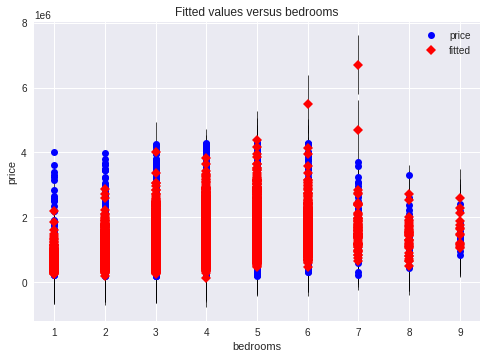

In [148]:
# Bedrooms vs. Price in millions.

sm.graphics.plot_fit(results, "bedrooms")
plt.show()

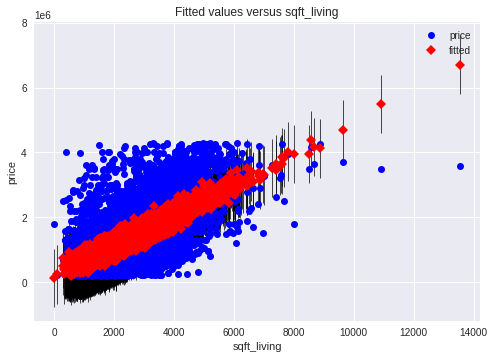

In [134]:
# Square Footage vs. Price in millions.

sm.graphics.plot_fit(results, "sqft_living")
plt.show()

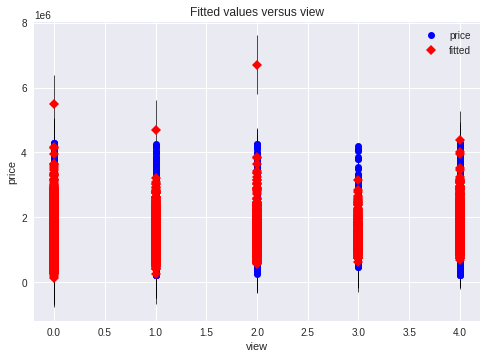

In [135]:
# Quality of View vs Price in millions.

sm.graphics.plot_fit(results, "view")
plt.show()

### Final Model

Model of houses on waterfront or greenway.

In [145]:
# Selecting the same independent variables as the previous model.

final_predictors = wg_merged[["bedrooms","bathrooms","view","sqft_living","floors","year_old",]]

In [146]:
X_final = final_predictors
y = wg_merged["price"]

In [147]:
final_model = sm.OLS(y, sm.add_constant(X_final))
final_results = final_model.fit()

final_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     158.6
Date:                Sun, 02 Oct 2022   Prob (F-statistic):          1.91e-147
Time:                        19:26:31   Log-Likelihood:                -17358.
No. Observations:                1178   AIC:                         3.473e+04
Df Residuals:                    1171   BIC:                         3.477e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -1.39e+05   1.13e+05     -1.234      0.218    -3.6e+05    8.21e+04
bedrooms    -1.119e+05   2.45e+04     -4.571      0.000    -1.6e+05   -6.39e+04
bathrooms    1.731e+05   3.56e+04      4.857      0.000    1.03e+05    2.43e+05
view         7.934e+04   1.57e+04      5.050      0.000    4.85e+04     1.1e+05
sqft_living   471.4431     29.534     15.963      0.000     413.498     529.389
floors       5.936e+04   4.49e+04      1.322      0.186   -2.87e+04    1.47e+05
year_old     4779.7545    968.998      4.933      0.000    2878.588    6680.922
==============================================================================
Omnibus:                      242.416   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              589.116
Skew:                           1.102   Prob(JB):                    1.19e-128
Kurtosis:                       5.673   Cond. No.                     1.86e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Square footage coefficient of 471 means each increase of 1 square foot increase, price increases by $471.

R-Squared number of .448 suggests there is not a significant relationship between the independent and dependent values.



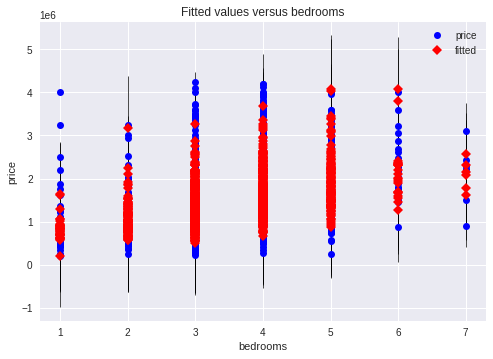

In [149]:
# Bedrooms vs. Price in millions.

sm.graphics.plot_fit(final_results, "bedrooms")
plt.show()

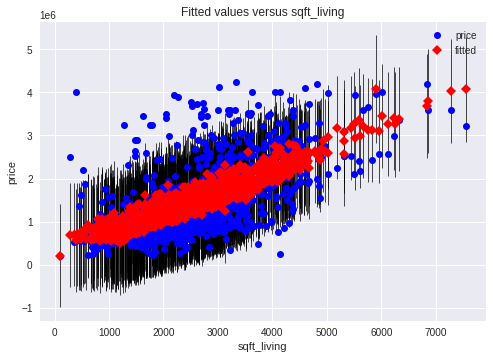

In [140]:
# Square Footage vs. Price in millions.

sm.graphics.plot_fit(final_results, "sqft_living")
plt.show()

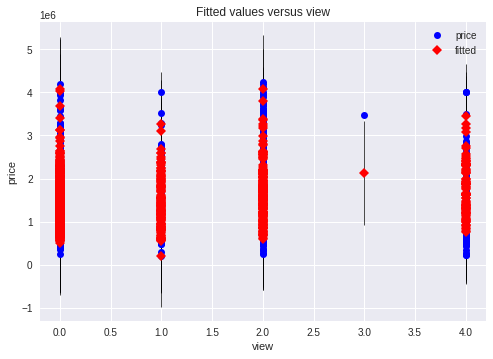

In [141]:
# Quality of View vs Price in millions.

sm.graphics.plot_fit(final_results, "view")
plt.show()

## Conclusion

Waterfront and Greenbelt homes had a higher price per square foot of 471 vs. 444  

Both had roughly the same effect on price from the quality of the view being a $79,000 increase on the scale of 0 to 4.

There don't seem to be other factors that have a major impact on sale price.